> **Hey Readers, I am new to Data Science. You may find some mistakes in Kernel, if so please write comment so that i can improve myself. Suggestions are always welcome**

# INTRODUCTION

This data contain infromation related to factor responsible for Heart Attack.We need to analyse the trends in heart data to predict certain cardiovascular events or find any clear indications of heart health. We will build Logistic Regression Machine Learning Model to predict future event.

# Importing Data

In [1]:
data=read.csv("../input/heart.csv")

# DATA UNDERSTANDING

> Insights:-
1. There is 300 observations of 14 Variables. 
2. Dependent Variable is Target which has 2 value 0 and 1. 0 means there is no heart attack and 1 means there is Heart Attack.
3. All other Vaariables such as age, sex, cp and others are independent variables.
4. There is integer and Numeric DataTypes of variables

Now we will discuss each variable and there effect on dependent variable one by one.

In [2]:
data=read.csv("../input/heart.csv")
head(data)
str(data)
dim(data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


[1] 303  14

# Age Analysis

> Insights :-
1. Minimum age is 29 and Maximum age is 77. Average age of Population is 54.37.
2. We can  also see Descriptive analysis through BoxPlot for Better Visualization.
3. There is low negative cor-relation between age and dependent variable target. This shows that on increasing age probability of heart attack is decreasing.
4. Maximum number of population lying between age group 55 and 60 years.
5. We can not extract information from scatter plot, so after fitting a smooth curve we can see that from age 30 to 60 probability of heart attack is decreasing and from 60 again probability is increasing. After 70 chance of heart attack is more.
6. P value is 0.13 which is greater than 0.05, So we will accept Null Hypothesis. So target is indepndent of Age.

[1] 29 77

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   47.50   55.00   54.37   61.00   77.00 

[1] 9.082101

[1] 82.48456

[1] -0.2254387

Warning message in chisq.test(data$age, data$target):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  data$age and data$target
X-squared = 50.129, df = 40, p-value = 0.1309


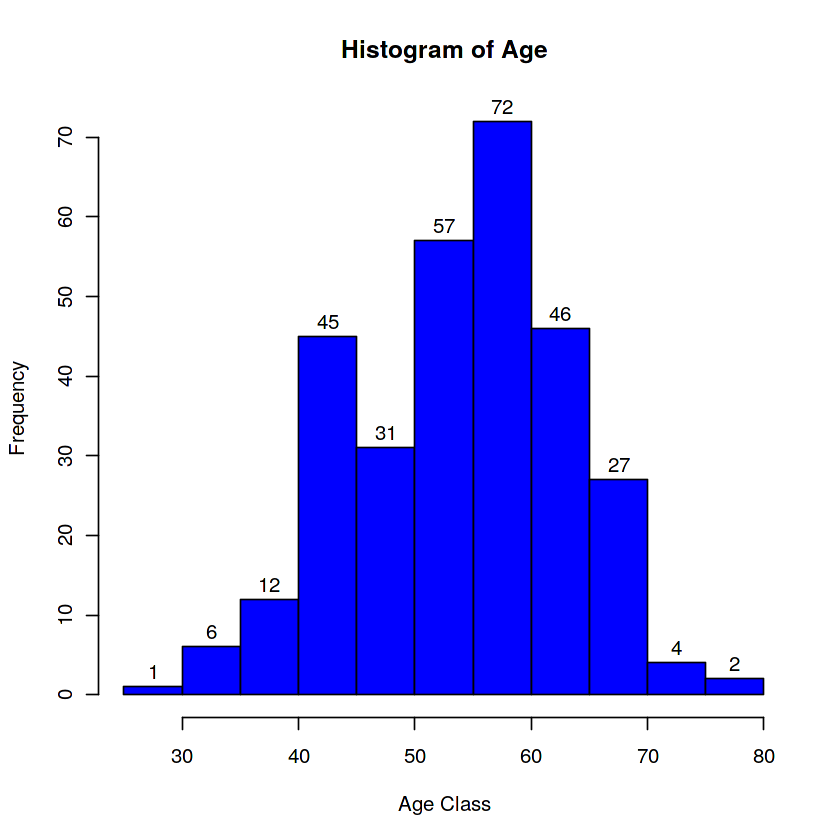

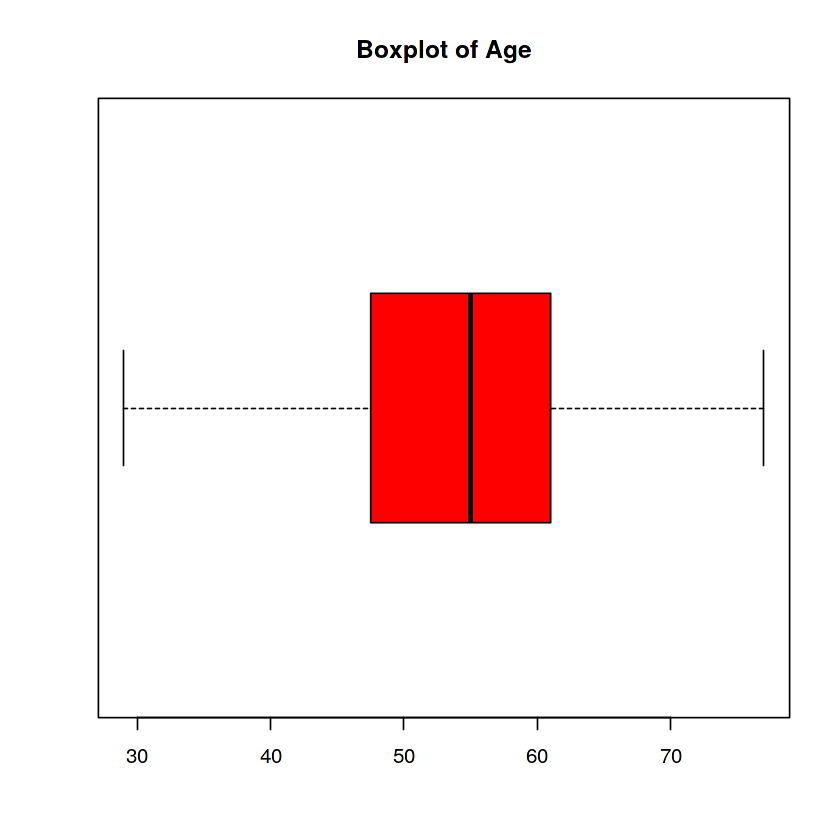

In [3]:
range(data$age)
summary(data$age)
sd(data$age)
var(data$age)
cor(data$age,data$target)
chisq.test(data$age,data$target)

hist(data$age,labels=TRUE,main="Histogram of Age",xlab="Age Class",ylab="Frequency",col="blue")

boxplot(data$age,horizontal=TRUE,col="red",main="Boxplot of Age")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


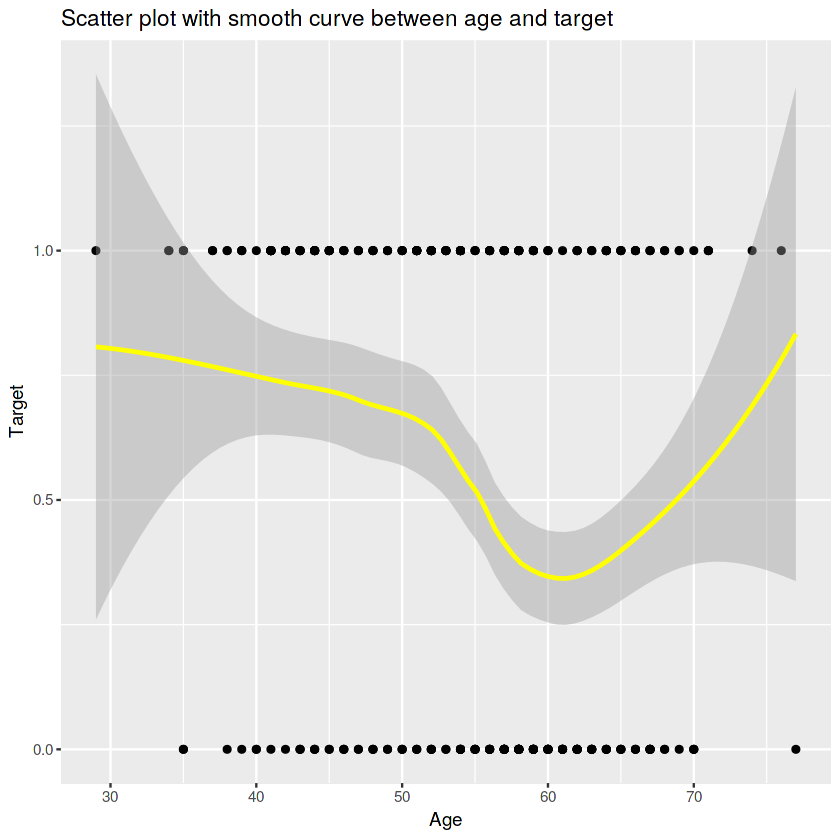

In [4]:
library(ggplot2)
a=ggplot(data,aes(x=age,y=target))+geom_point()+geom_smooth(color="yellow")
b=a+scale_x_continuous(name="Age")+scale_y_continuous(name="Target")
b+ggtitle("Scatter plot with smooth curve between age and target")

# SEX Analysis

> Insights:-
1. This variable has 2 category 0 represents female and 1 means male.
2. Out of 303 Observations 96 of them are Female and 207 are male.
3. In barplot it is clearly Visible that proportion of male is more as compared to female. Also in Pie chart we can see that proportion of female is 32 % while male is 68%.
4. In side by side Barchart we can see that in case of not suffered with Heart Attack, Feamle is very less while more male has survived heart attack. Now when we look at the Population suffered with Attack it can be seeing clearly that more male suffered with Heart Attack.
5. In scatter plot with smooth line between age and target comparing with Sex, Male with age group 45 to 55 is less likely to get heart attack while Female with age group 55 to 65 is less likely to get Heart Attack.

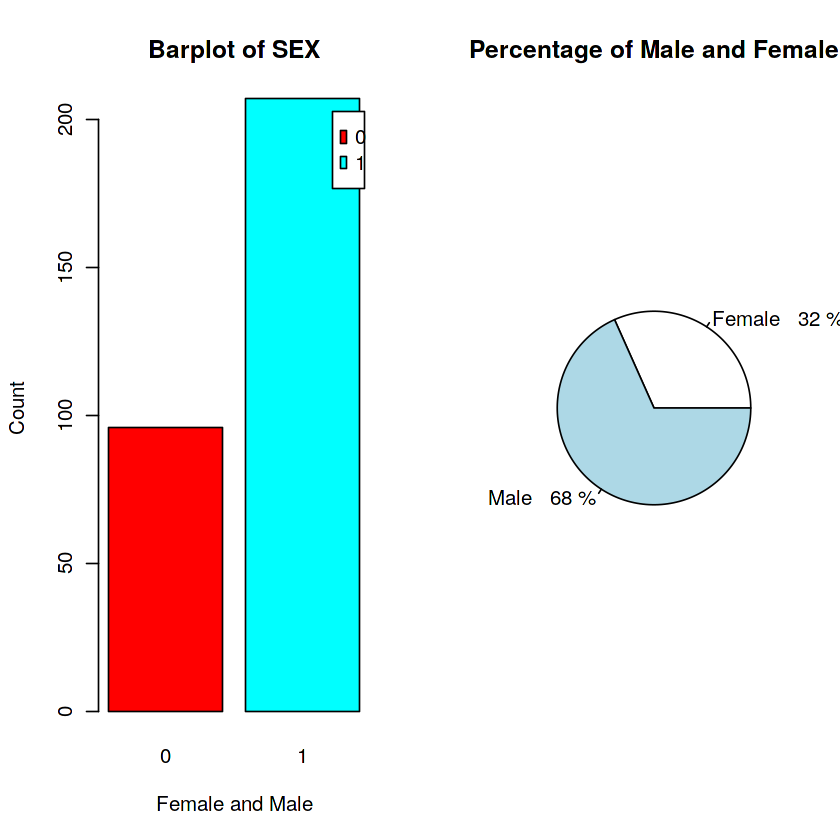

In [5]:
a=table(data$sex)
par(mfrow=c(1,2))
barplot(a,
       col=rainbow(2),
       legend=rownames(a),
       xlab="Female and Male",
       ylab="Count",
       main="Barplot of SEX")

pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
pie(a,labels=lbs,main="Percentage of Male and Female")

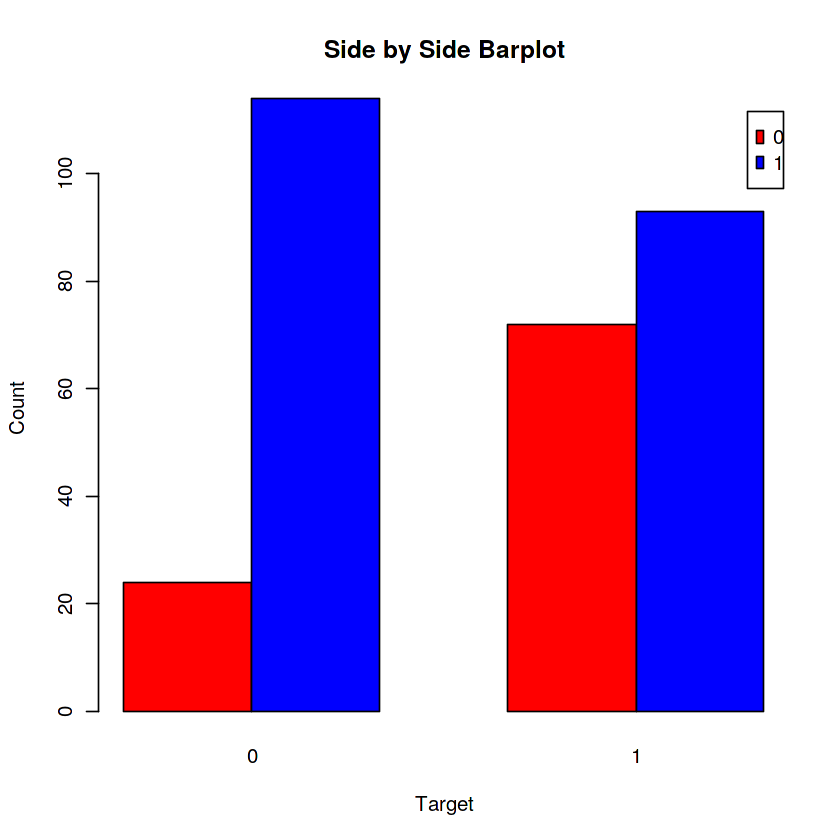

In [6]:
b=table(data$sex,data$target)
barplot(b,
       col=c("red","blue"),
       legend=rownames(b),
       beside=TRUE,
       xlab="Target",
       ylab="Count",
       main="Side by Side Barplot")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


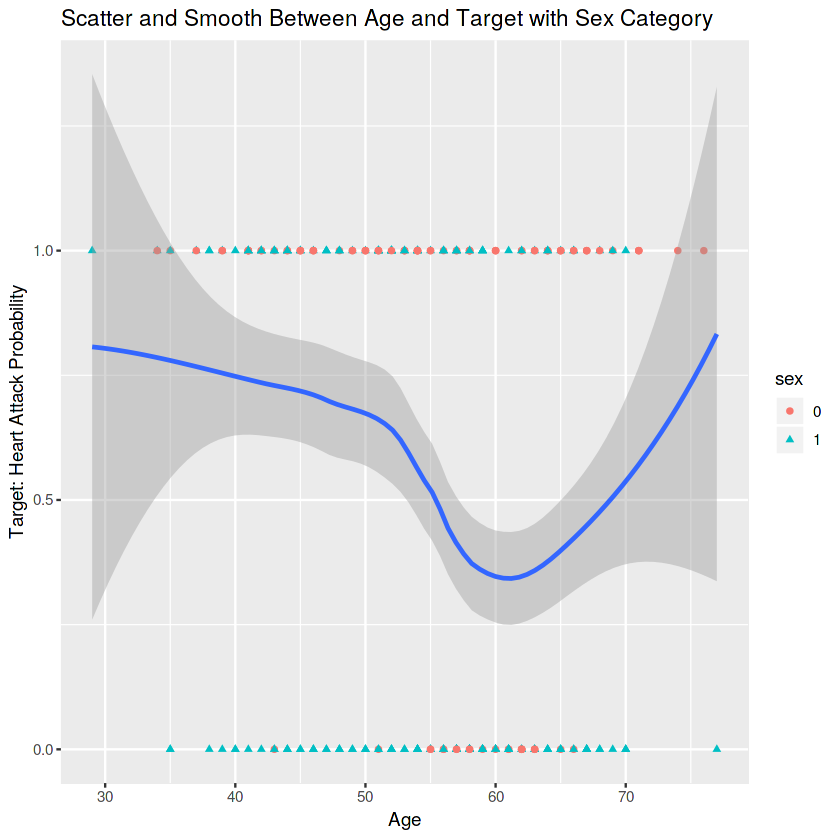

In [7]:
data$sex=factor(data$sex)
library(ggplot2)
c=ggplot(data,aes(x=age,y=target))+geom_point(aes(shape=sex,color=sex))+geom_smooth()
c+scale_x_continuous(name="Age")+scale_y_continuous(name="Target: Heart Attack Probability")+ggtitle("Scatter and Smooth Between Age and Target with Sex Category")

# Chest Pain Analysis

> Insights :-
1. There is 4 category of Chest pain starting from 0 up to 3.
2. In barplot it is clear that, People having Chest pain 0 are more followed by 2.
3. We can Visualize through smooth curve between age and target that People having Chest Pain 0 and age from 40 to 65 are less likely to get heart attack.
4. People with chest pain 2 are more likely to get heart attack.

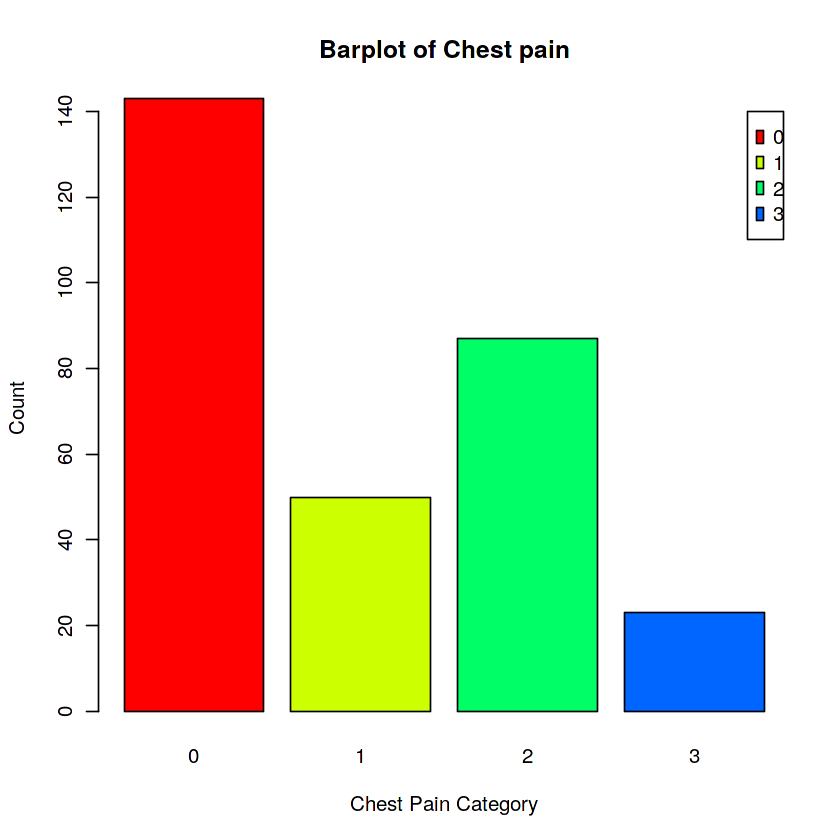

In [8]:
data$cp=factor(data$cp)
d=table(data$cp)
barplot(d,
       col=rainbow(5),
       main="Barplot of Chest pain",
       xlab="Chest Pain Category",
       ylab="Count",
       legend=rownames(d))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


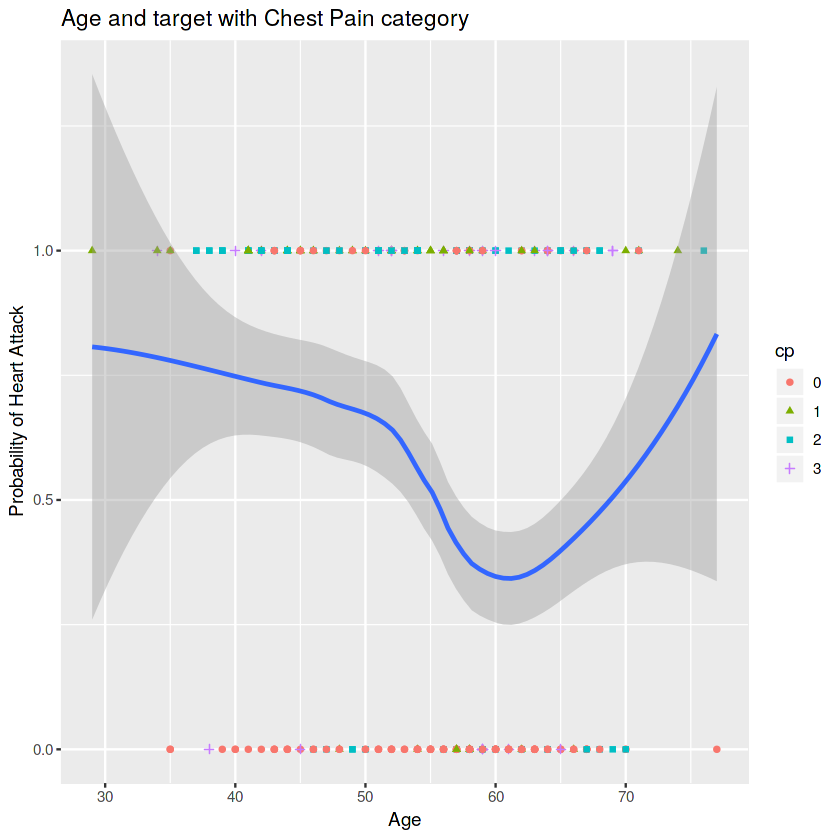

In [9]:
library(ggplot2)
e=ggplot(data,aes(x=age,y=target))+geom_point(aes(shape=cp,color=cp))+geom_smooth()
e+scale_x_continuous(name="Age")+scale_y_continuous(name="Probability of Heart Attack")+ggtitle("Age and target with Chest Pain category")

# Rest Blood Pressure Analysis

> Insights :-
1. Minimum RBP(Rest Blood Pressure) is 94 and Maximum is 200.
2. Average RBP is 131.6
3. We can see Box Plot for Descriptive Analysis of Rest Blood Pressure.
4. There is low positive correlation between RBP and Target, On increasing RBP chance of getting Heart attack will increase.
5. We can clearly see in Histogram, Maximum number of Population have Rest Blood Pressure between 120 and 140.
5. People having RBP between 95 and 110 are more likely to get Heart Attack.
6. We can see in smooth curve probability of Heart Attack is decreasing after RBP 135.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   94.0   120.0   130.0   131.6   140.0   200.0 

[1] 0.2793509

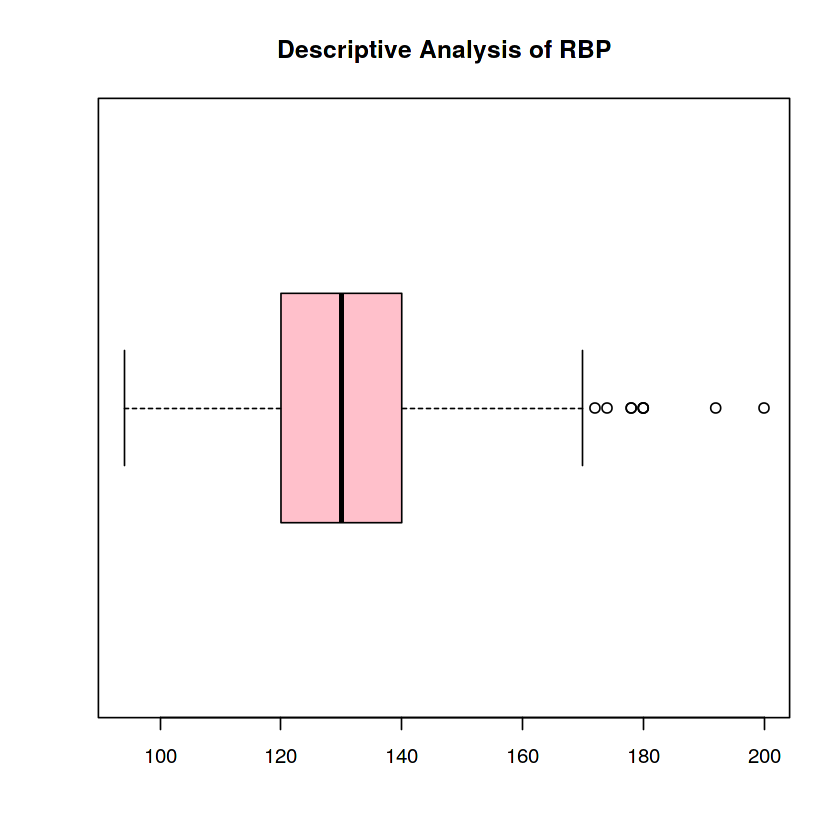

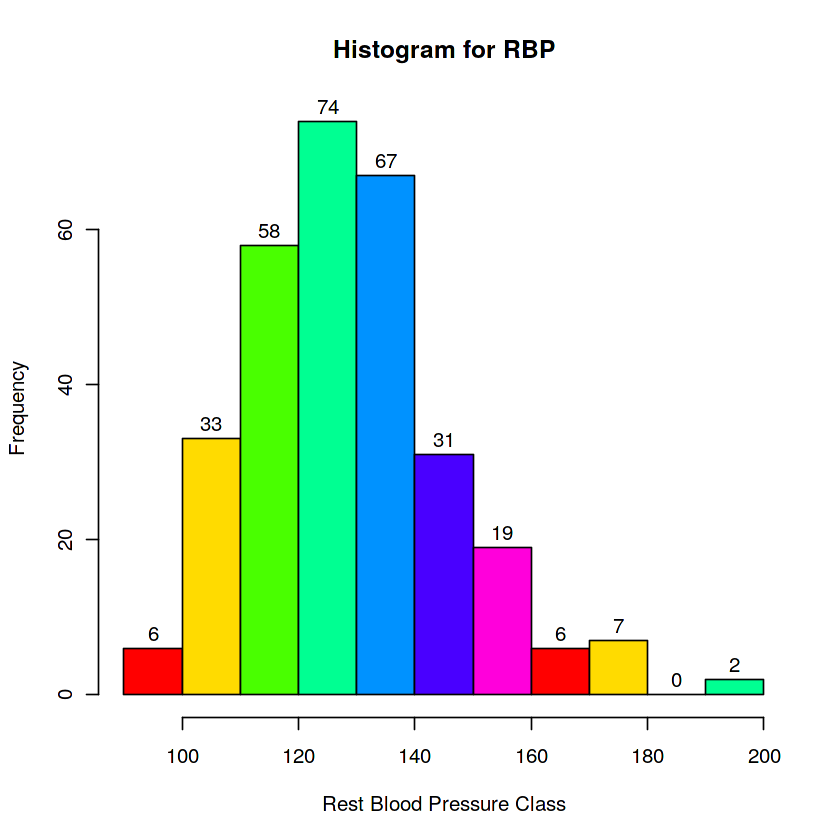

In [10]:
summary(data$trestbps)
cor(data$trestbps,data$age)
boxplot(data$trestbps,
       col="pink",
       main="Descriptive Analysis of RBP",
       horizontal=TRUE)

hist(data$trestbps,col=rainbow(7),
    main="Histogram for RBP",
    xlab="Rest Blood Pressure Class",
    ylab="Frequency",
    labels=TRUE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


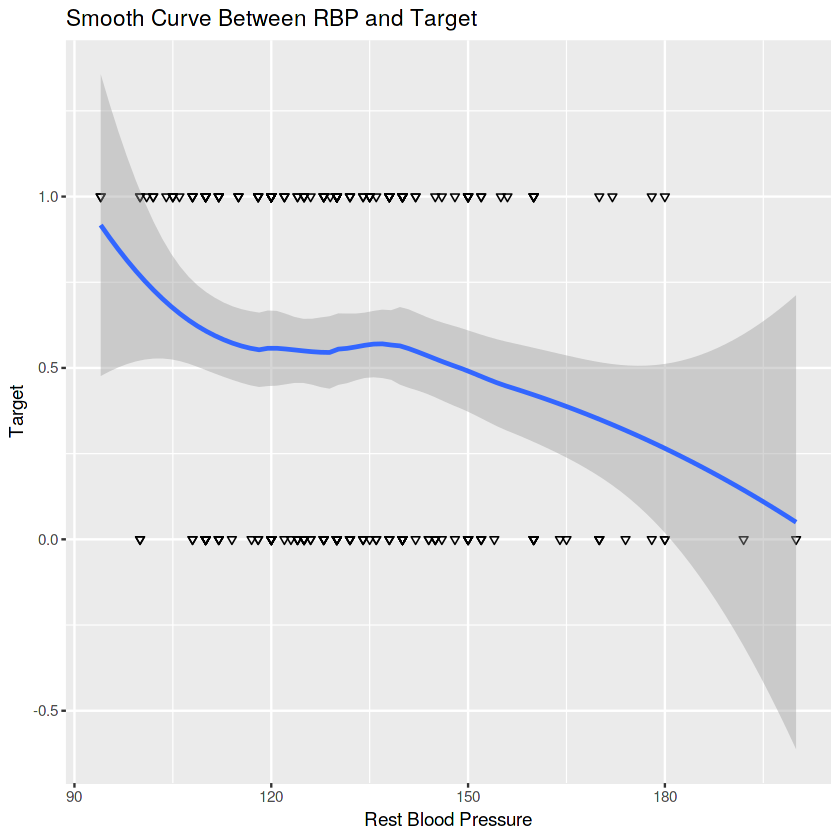

In [11]:
library(ggplot2)
f=ggplot(data,aes(x=trestbps,y=target))+geom_point(shape=6)+geom_smooth()
f+scale_x_continuous(name="Rest Blood Pressure")+scale_y_continuous(name="Target")+ggtitle("Smooth Curve Between RBP and Target")

# Cholestrol Analysis
> Insights:-
1. Minimum Cholestrol among patients is 126, Maxmum is 564 and Average Cholestrol is 246.3.
2. We can see Boxplot for descriptive Analysis seperately for Male and Female. In boxplot it is also clear that Male has lower colestrol than Female.
3. We can clearly see in Histogram that maximum population have cholestrol between 200 and 250 unit.
4. In Smooth curve we can clearly see that probability of Heart attack is increasing after cholestrol level 300.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  126.0   211.0   240.0   246.3   274.5   564.0 

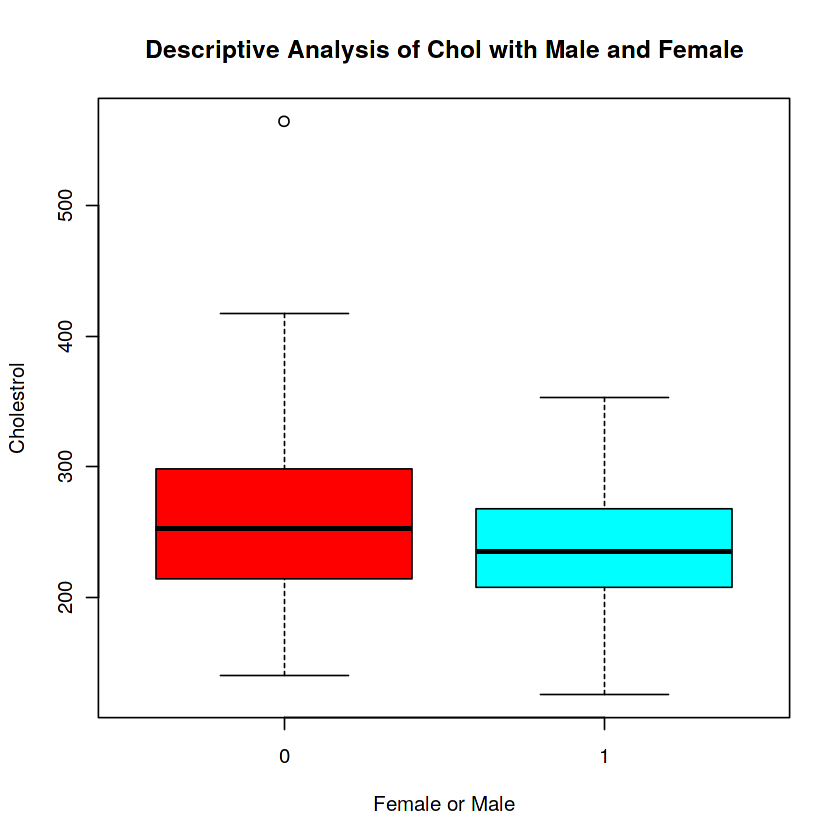

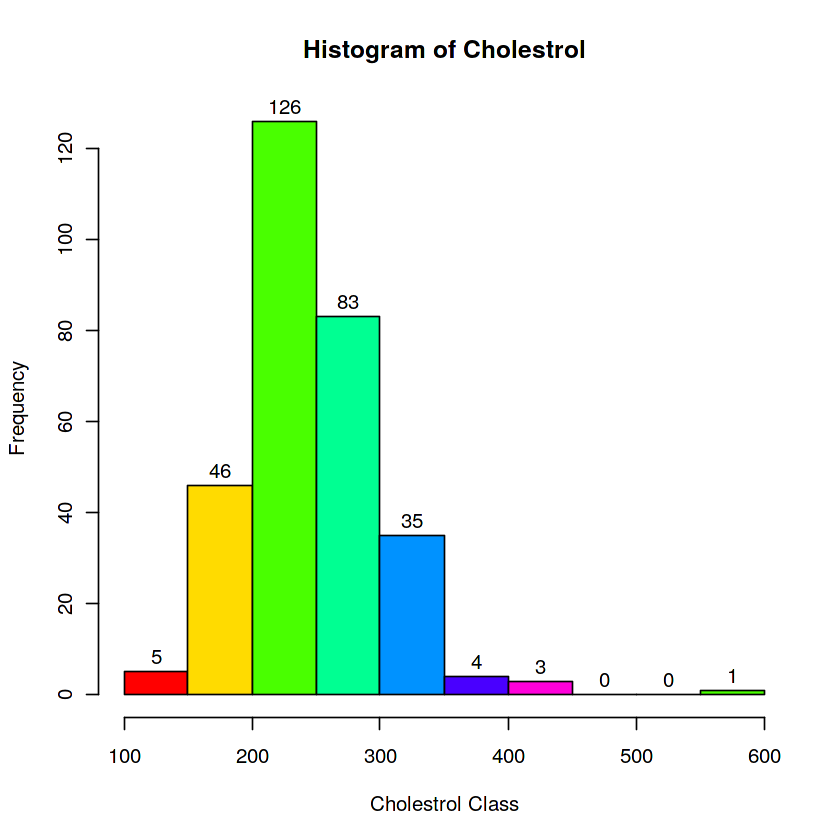

In [12]:
summary(data$chol)
boxplot(data$chol~as.factor(data$sex),col=rainbow(2),main="Descriptive Analysis of Chol with Male and Female",
       xlab="Female or Male",
       ylab="Cholestrol")

hist(data$chol,
    main="Histogram of Cholestrol",
    xlab="Cholestrol Class",
    ylab="Frequency",
    col=rainbow(7),labels=TRUE)
data$sex=as.factor(data$sex)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


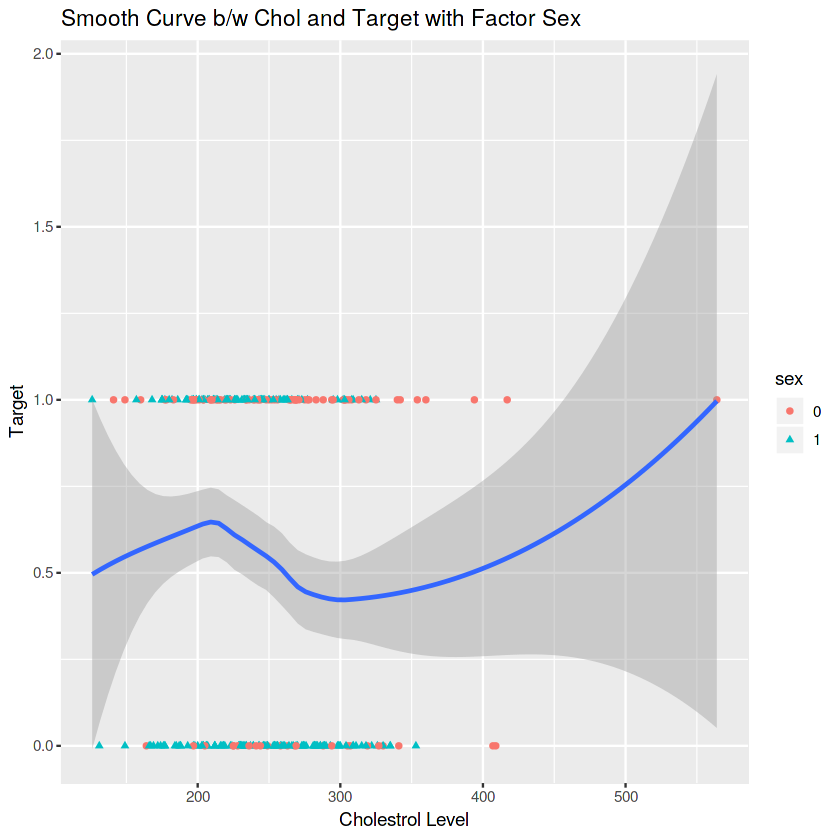

In [13]:
library(ggplot2)
ggplot(data,aes(x=chol,y=target))+geom_point(aes(shape=sex,color=sex))+geom_smooth()+
    ggtitle("Smooth Curve b/w Chol and Target with Factor Sex")+
    scale_x_continuous(name="Cholestrol Level")+
    scale_y_continuous(name="Target")

# Fasting Blood Sugar Analysis
> Insights:-
1. This is a Categorical Variable in which 0 means level is less than 120 unit and 1 means it is greater than 120 unit.
2. In Bar chart and Pie chart it is clearly visible that maximum(85% of the population) Peoples have FBS less than 120.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1485  0.0000  1.0000 

[1] "integer"

[1] 1 0 0 0 0 0 0 0 1 0

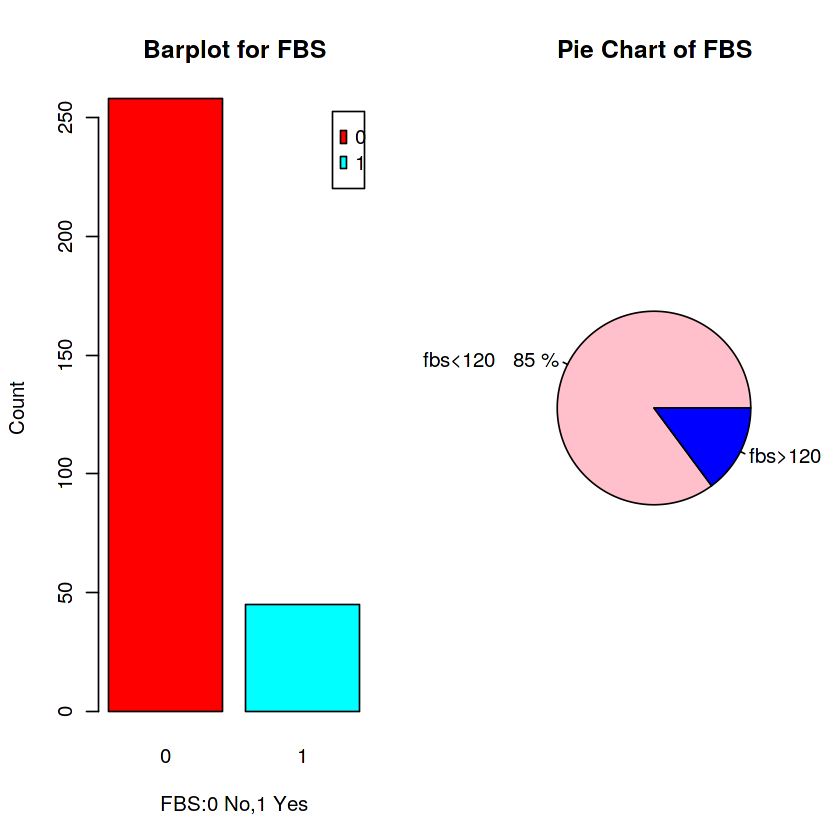

In [14]:
summary(data$fbs)
class(data$fbs)
head(data$fbs,10)
h=table(data$fbs)
par(mfrow=c(1,2))
barplot(h,
       main="Barplot for FBS",
       xlab="FBS:0 No,1 Yes",
       ylab="Count",
       col=rainbow(2),
       legend=rownames(h))
pct=round(h/sum(h)*100)
lbs=paste(c("fbs<120","fbs>120")," ",pct,"%",sep=" ")
pie(h,lbs,main="Pie Chart of FBS",col=c("pink","blue"))

# Resting ECG result
> Insights:-
1. There is 3 Category in this Variabble 0,1 and 2.
2. Category 2 of ECG is very less and category 1 or 2 are nearly same.

[1] 0 1 2

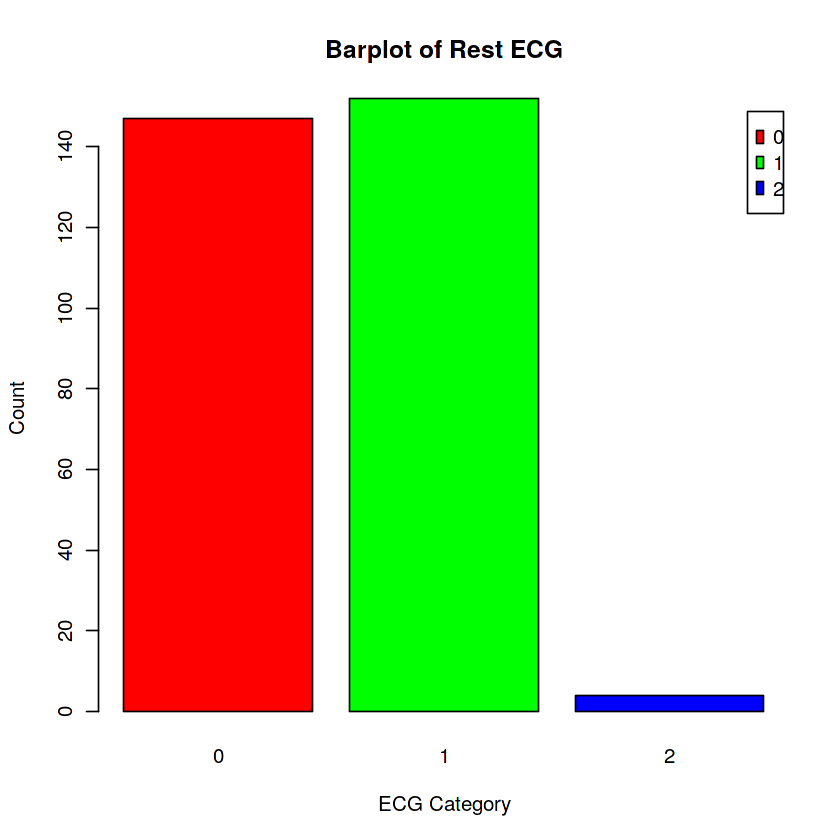

In [15]:
unique(data$restecg)
j=table(data$restecg)
barplot(j,
       main="Barplot of Rest ECG",
       xlab="ECG Category",
       ylab="Count",
       col=rainbow(3),legend=rownames(j))

# Maximum Heart Rate
> Insights:-
1. This is continous data with minimum heart rate achieved 71 and maximum 202.
2. In boxplot we can see that Maximum heart Rate achieved is greater in Male than Female.
3. We can see in chi square test between age and Heart Rate, P value is less than 0.05 so Heart Rate is depending on Age.
4. There is negative corelation between age and heart rate, this means on getting older Heart rate is decreasing which can also be seen clearly in smooth curve.
5. We can also see scatter plot and smooth curve between Heart rate and Heart Attack, On increasing Heart rate probability of getting Heart attack is increasing.

[1] "integer"

[1] 150 187 172 178 163 148

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   71.0   133.5   153.0   149.6   166.0   202.0 

Warning message in chisq.test(data$age, data$thalach):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  data$age and data$thalach
X-squared = 3945.4, df = 3600, p-value = 3.829e-05


[1] -0.3985219

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


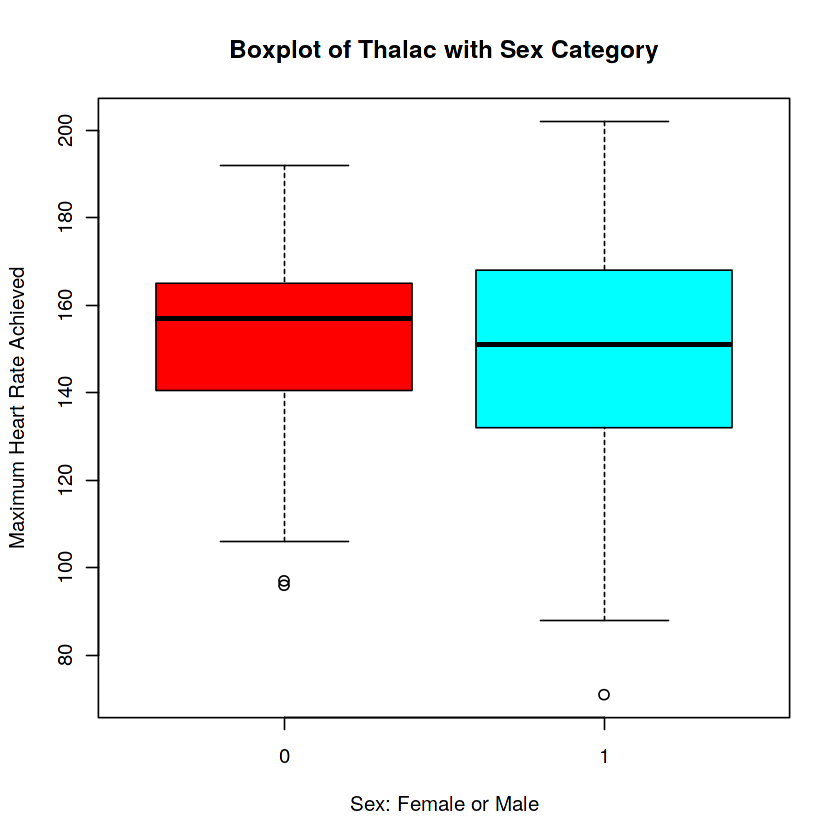

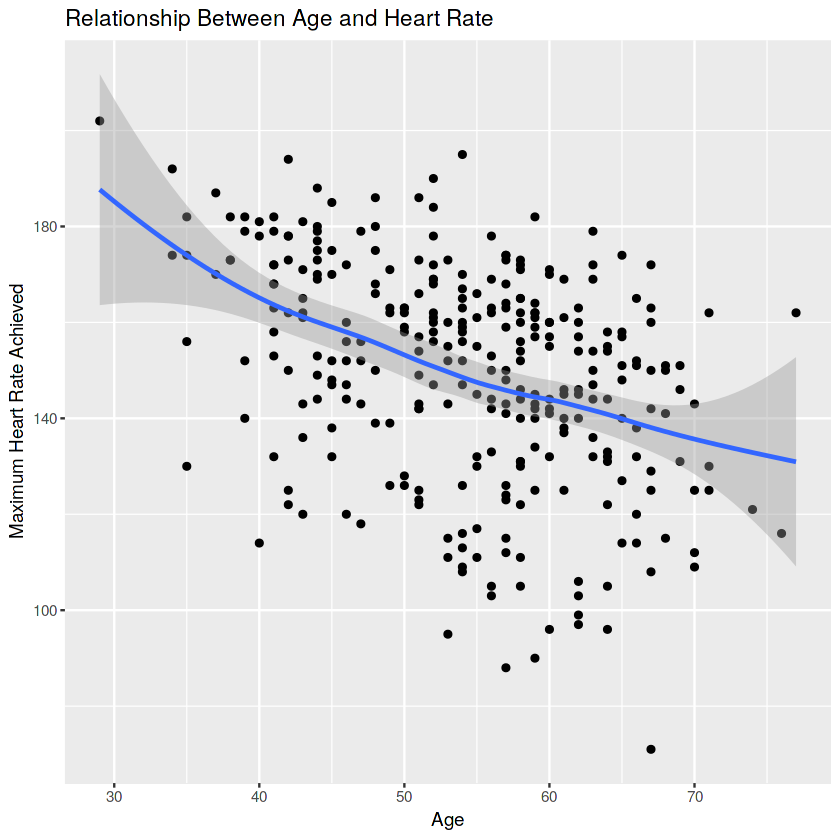

In [16]:
class(data$thalach)
head(data$thalach)
summary(data$thalach)
boxplot(data$thalach~as.factor(data$sex),
       main="Boxplot of Thalac with Sex Category",
       xlab="Sex: Female or Male",
       ylab="Maximum Heart Rate Achieved",
       col=rainbow(2))
#Chi square test to see how age and Heart rate is corelating
chisq.test(data$age,data$thalach)
#Let us see how age is effecting Heart Rate
cor(data$age,data$thalach)
library(ggplot2)
ggplot(data,aes(x=age,y=thalach))+geom_point()+geom_smooth()+
    scale_x_continuous(name="Age")+
    scale_y_continuous(name="Maximum Heart Rate Achieved")+
    ggtitle("Relationship Between Age and Heart Rate")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


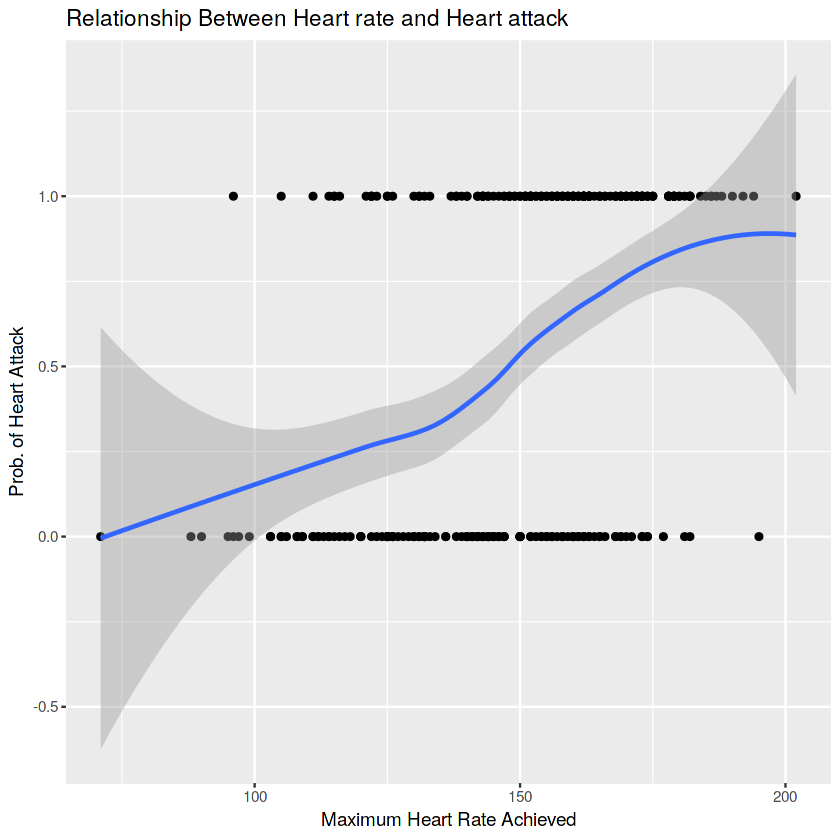

In [17]:
library(ggplot2)
ggplot(data,aes(x=thalach,y=target))+geom_point()+geom_smooth()+
    scale_x_continuous(name="Maximum Heart Rate Achieved")+
    scale_y_continuous(name="Prob. of Heart Attack")+
    ggtitle("Relationship Between Heart rate and Heart attack")

******

# Exercise Induced Angina
> Angine is a type of Chest Pain caused by induced flow of blood to heart.

> Insights:-

1. This variable is categorical(Two category 0 and 1) where 0 means no Exang.
2. We can clearly see in stacked barplot that people with no Exang is more likely to get Heart Attack.
3. From the curve between Exang and Target it is clear that with increase in Exang, Chance of Heart attack is increasing.

[1] "integer"

[1] 0 0 0 0 1 0

   
      0   1
  0  62 142
  1  76  23

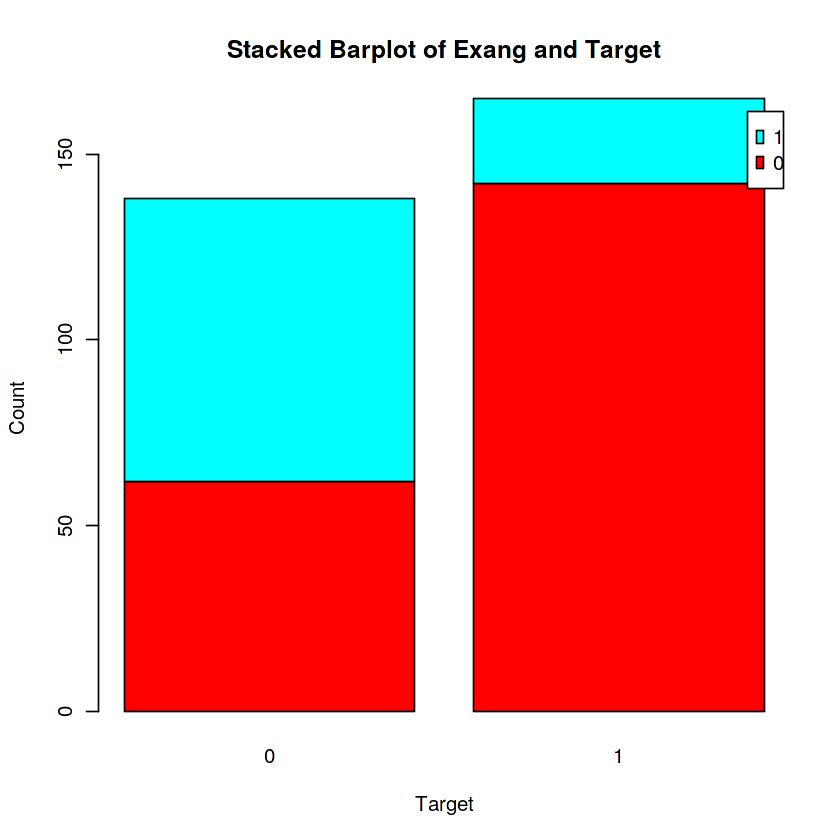

In [18]:
class(data$exang)
head(data$exang)
k=table(data$exang,data$target)
k
barplot(k,
       legend=rownames(k),
       col=rainbow(2),
       main="Stacked Barplot of Exang and Target",
       xlab="Target",
       ylab="Count")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.005”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.005”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.01”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.005”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 1.005”Warning message in predLoess(obje

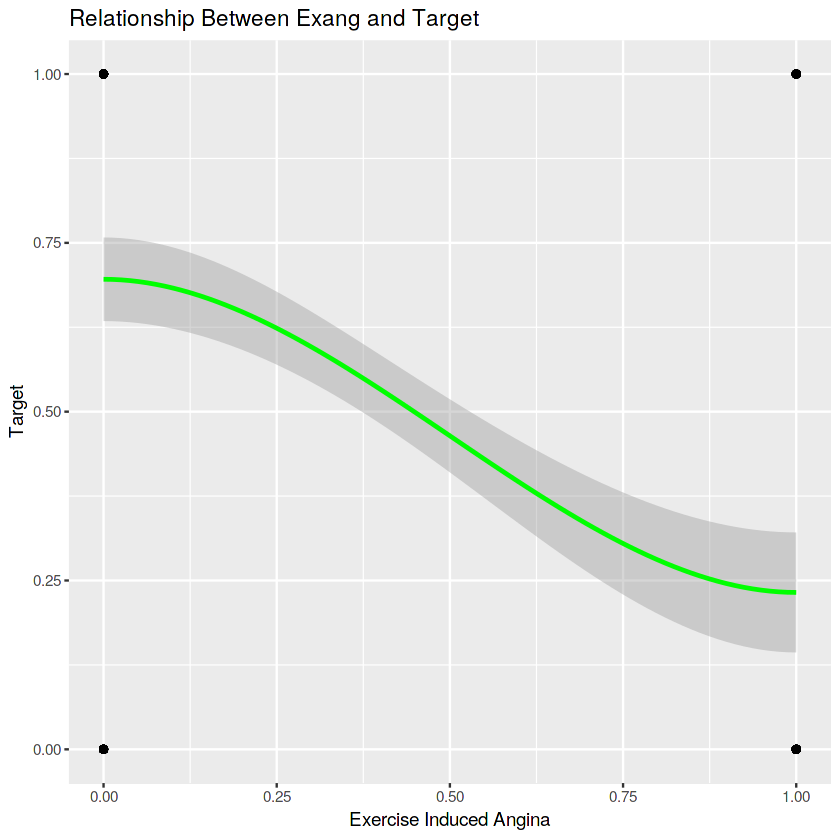

In [19]:
library(ggplot2)
ggplot(data,aes(x=exang,y=target))+geom_point()+geom_smooth(color="green")+
    scale_x_continuous(name="Exercise Induced Angina")+
    scale_y_continuous(name="Target")+
    ggtitle("Relationship Between Exang and Target")

# OldPeak Analysis

Oldpeak is ST depression induced by exercise relative to rest.

> Insights:-

1. This variable is numeric with minimum being 0 and maximum 6.20
2. We can see in Histogram maximum population is lying between 0 - 0.5 .
3. Data is right skewed, not normally distributed.
4. In boxplot we can see that oldpeak is generally more in male as compared to female. Also Their are some outliers(bad data) which is represented by circle above boxplot.
5. In smooth curve between oldpeak and Heart attack we can see that there is a decreasing trend between them. In general on increasing oldpeak probability of heart attack is decreasing.

In [20]:
class(data$oldpeak)
head(data$oldpeak,10)
summary(data$oldpeak)
range(data$oldpeak)
sd(data$oldpeak)
var(data$oldpeak)

[1] "numeric"

[1] 2.3 3.5 1.4 0.8 0.6 0.4 1.3 0.0 0.5 1.6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.80    1.04    1.60    6.20 

[1] 0.0 6.2

[1] 1.161075

[1] 1.348095

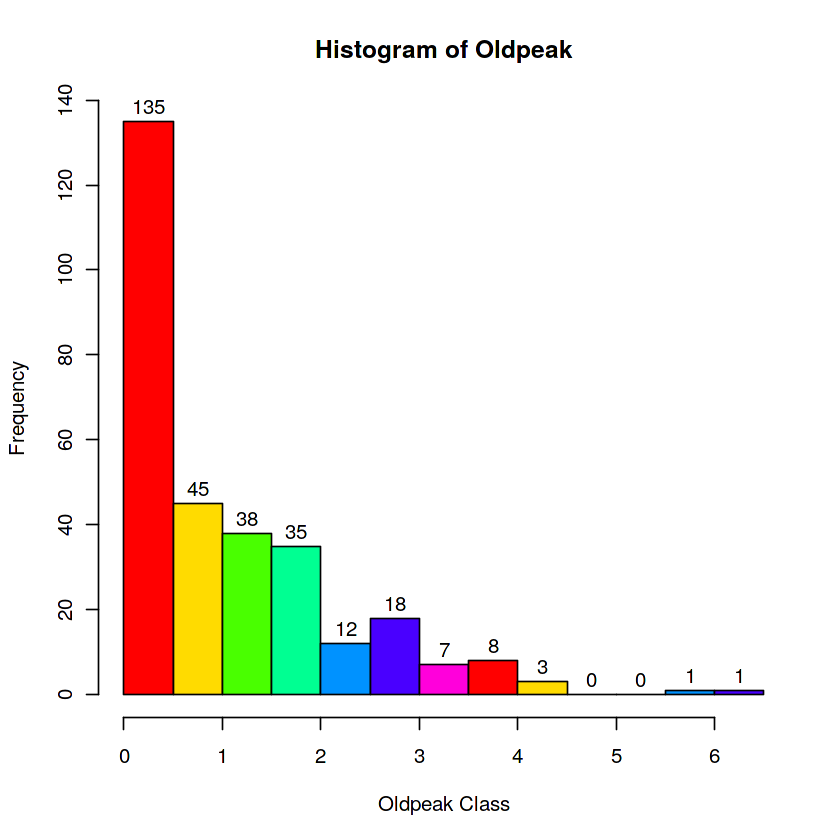

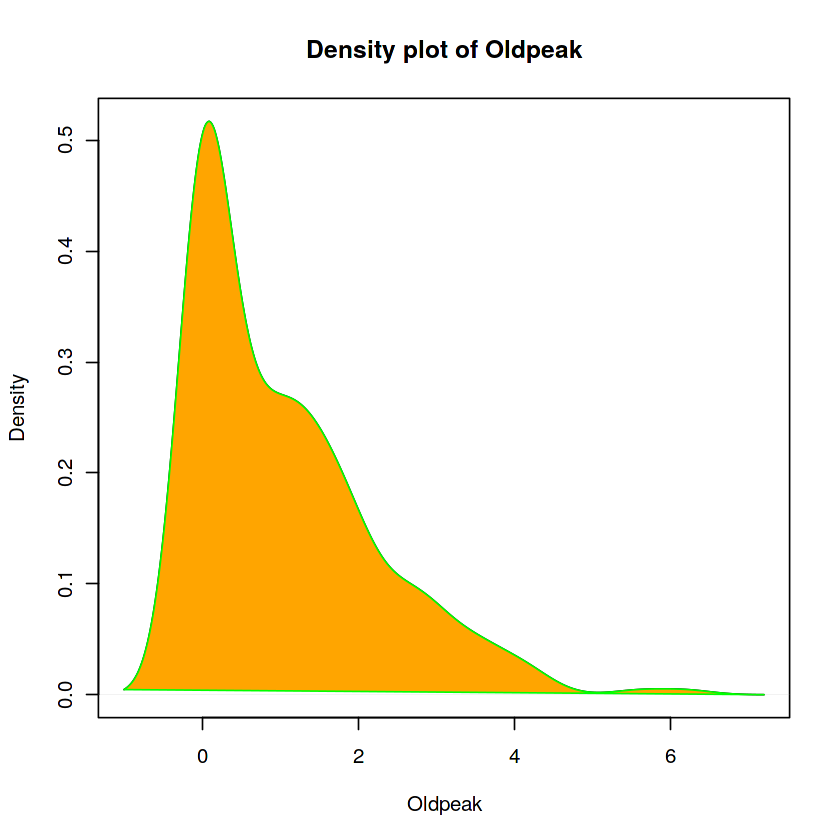

In [21]:
hist(data$oldpeak,
    main="Histogram of Oldpeak",
    xlab="Oldpeak Class",
    ylab="Frequency",
    col=rainbow(7),
    labels=TRUE)

plot(density(data$oldpeak),
    main="Density plot of Oldpeak",
    xlab="Oldpeak",
    ylab="Density")
polygon(density(data$oldpeak),col="orange",border="green")

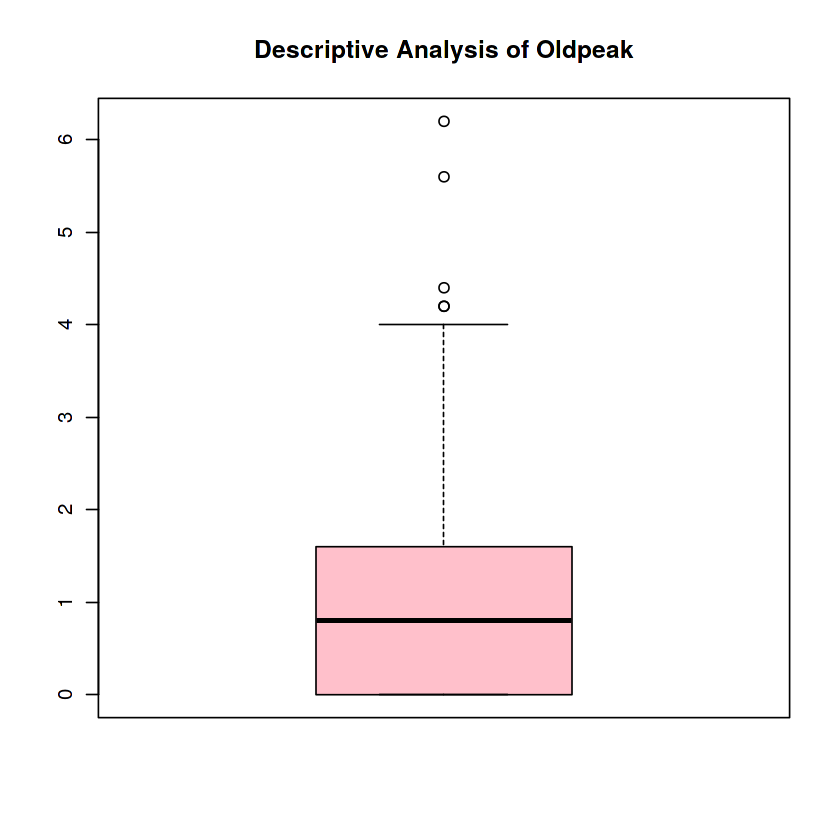

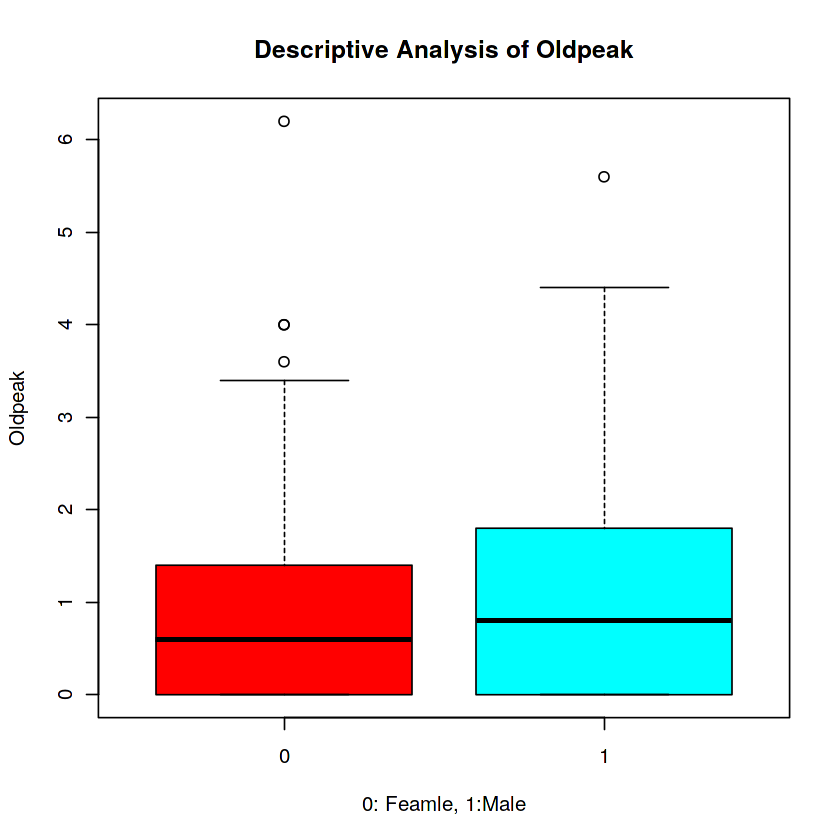

In [22]:
#Let us see descriptive Analysis

boxplot(data$oldpeak,
       main="Descriptive Analysis of Oldpeak",col="pink")

boxplot(data$oldpeak~data$sex,
       main="Descriptive Analysis of Oldpeak",col=rainbow(2),xlab="0: Feamle, 1:Male",
       ylab="Oldpeak")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


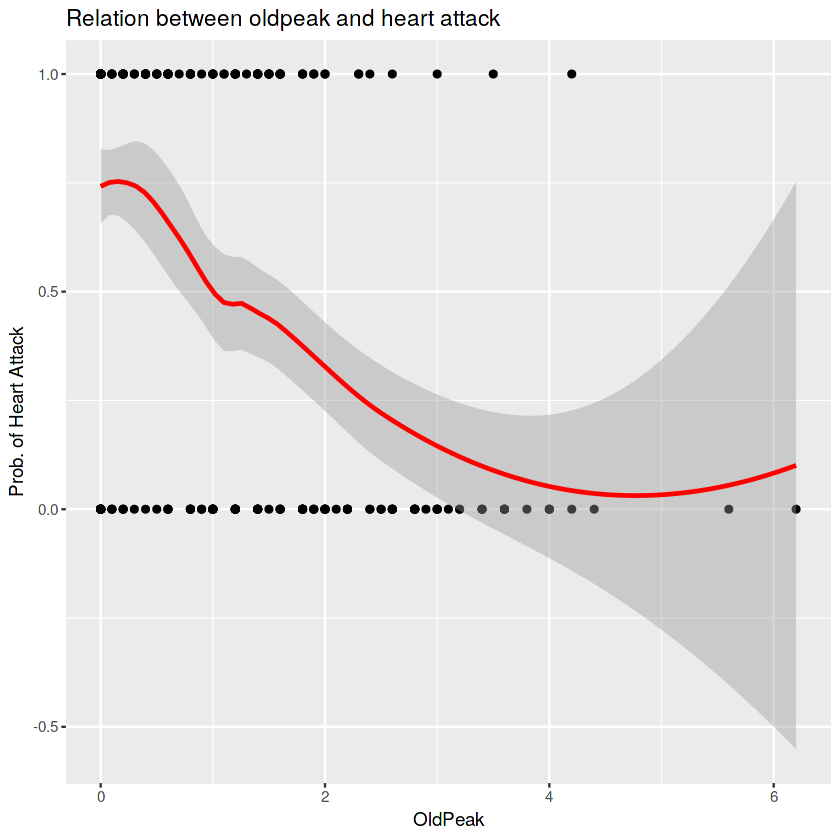

In [23]:
#relationship between oldpeak and target

library(ggplot2)
ggplot(data,aes(x=oldpeak,y=target))+geom_point()+geom_smooth(color="red")+
    scale_x_continuous(name="OldPeak")+
    scale_y_continuous(name="Prob. of Heart Attack")+
    ggtitle("Relation between oldpeak and heart attack")

# Slope Analysis

Slope of Peak Exercise
> Insights:-
1. This is integer datatype with 3 categories 0,1 and 2.
2. In boxplot we can see that population with slope 1 and 2 are nearly same and in maximum number.
3. In stacked barplot we can see that people with oldpeak category 2 is more likely to get heart attack and with 1 category is less likely to get heart attack.
4. In smooth curve between slope and target we can see that after unit 1 of slope with increase in slope, probability of heart attack is increasing.

In [24]:
class(data$slope)
head(data$slope)
unique(data$slope)

[1] "integer"

[1] 0 0 2 2 2 1

[1] 0 2 1


  0   1   2 
 21 140 142 

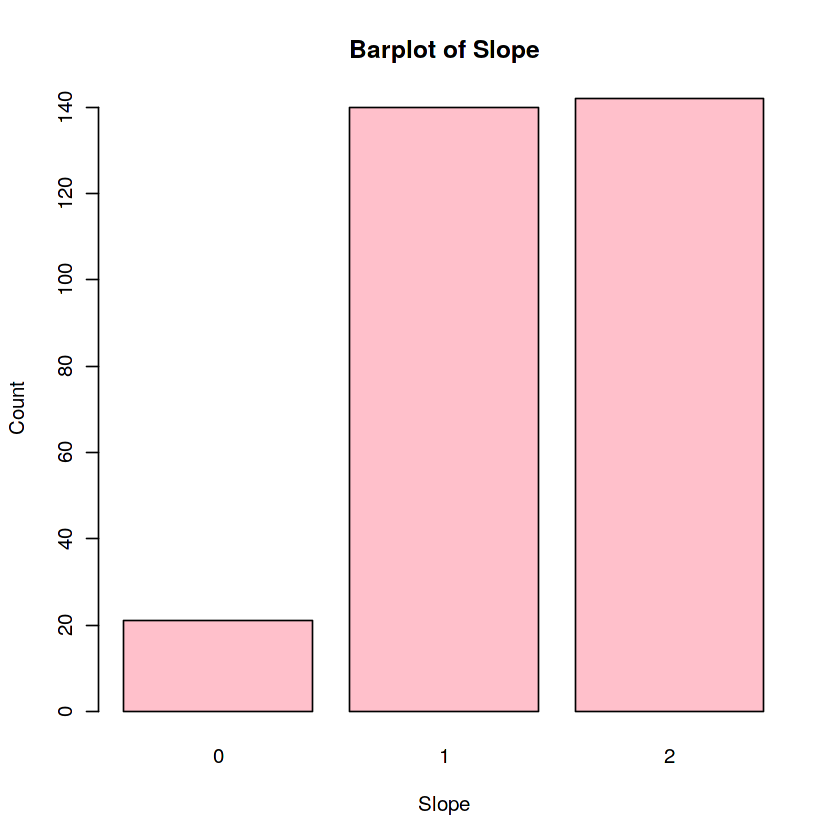

In [25]:
l=table(data$slope)
l
barplot(l,
       main="Barplot of Slope",
       xlab="Slope",
       ylab="Count",col="pink")

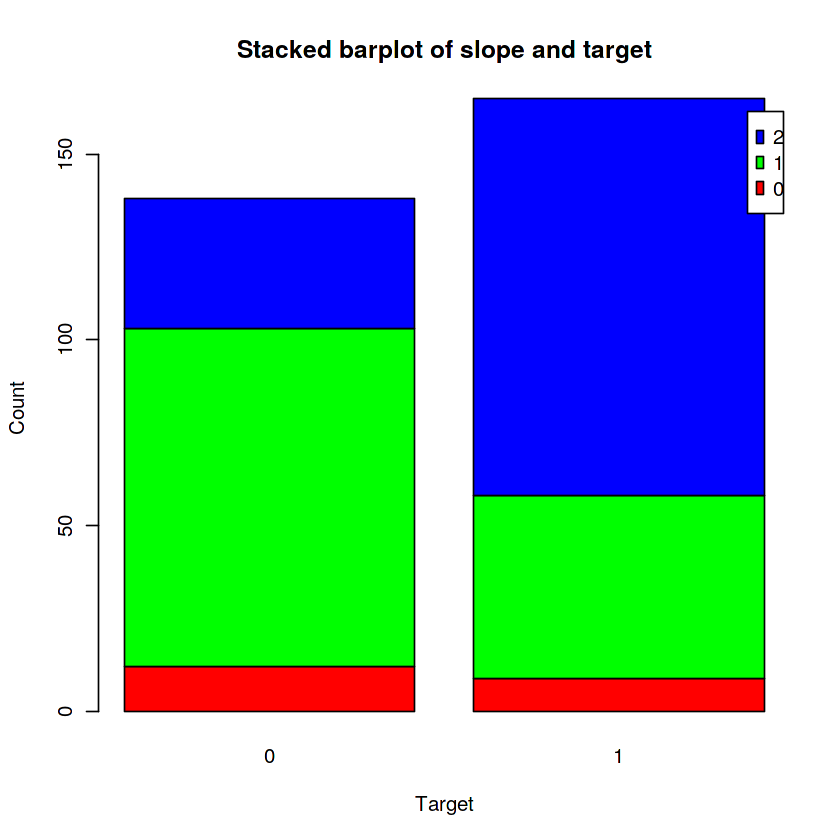

In [26]:
m=table(data$slope,data$target)
barplot(m,
       main="Stacked barplot of slope and target",
       col=rainbow(3),
       xlab="Target",
       ylab="Count",legend=rownames(m))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.01”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.01”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  3.3703e-17”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.01”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2.01”Warning message in predLoe

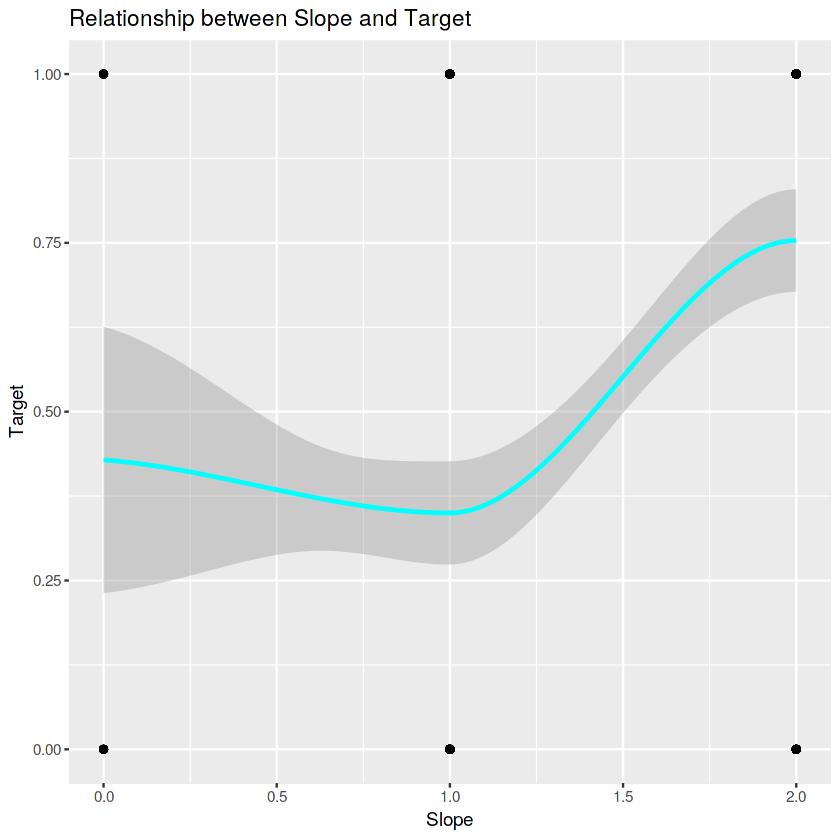

In [27]:
#relationship between slope and target
library(ggplot2)
ggplot(data,aes(x=slope,y=target))+geom_point()+geom_smooth(color="cyan")+
    scale_x_continuous(name="Slope")+
    scale_y_continuous(name="Target")+
    ggtitle("Relationship between Slope and Target")

# Ca Analysis

The Number of masor Vesseles: 0-4 colored by Flourosopy

> Insights:-

1. In barplot we can see that, Most of population are with 0 ca category.
2. By chance in stacked barplot betweem ca and target, we can see that people with ca category 0 are more likely to get heart attack.
3. In smooth curve between ca and target, we can see that there is local minima at ca category 2, First on increasing ca prob. of heart attack is decreasing again after local minima on increasing ca, prob of heart attack is increasing.


In [28]:
class(data$ca)
head(data$ca,10)
tail(data$ca,10)
unique(data$ca)

[1] "integer"

[1] 0 0 0 0 0 0 0 0 0 0

[1] 0 0 2 0 2 0 0 2 1 1

[1] 0 2 1 3 4

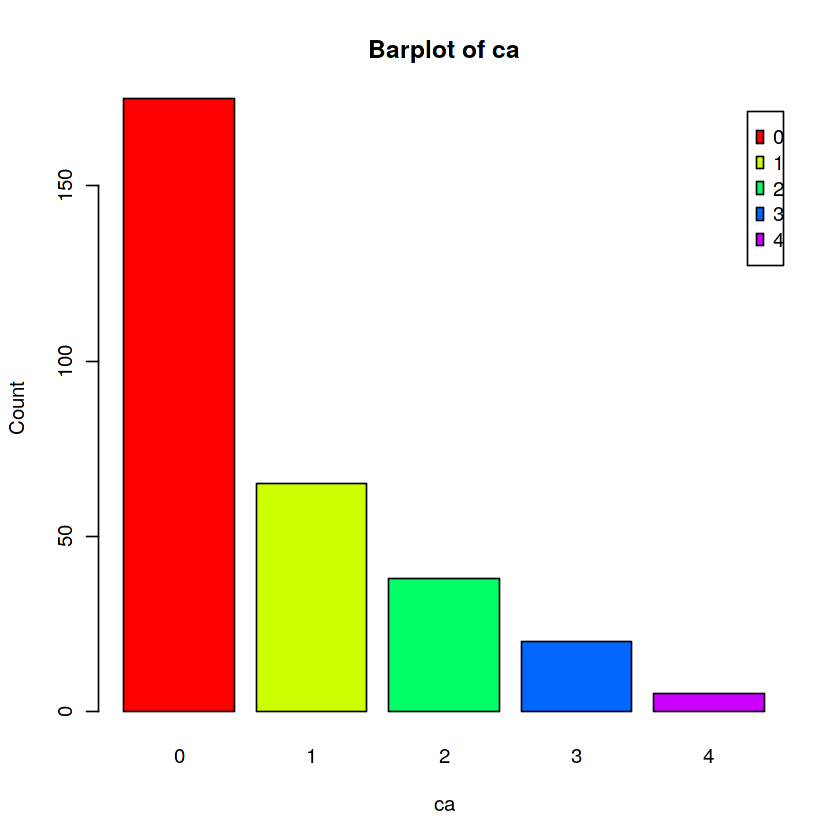

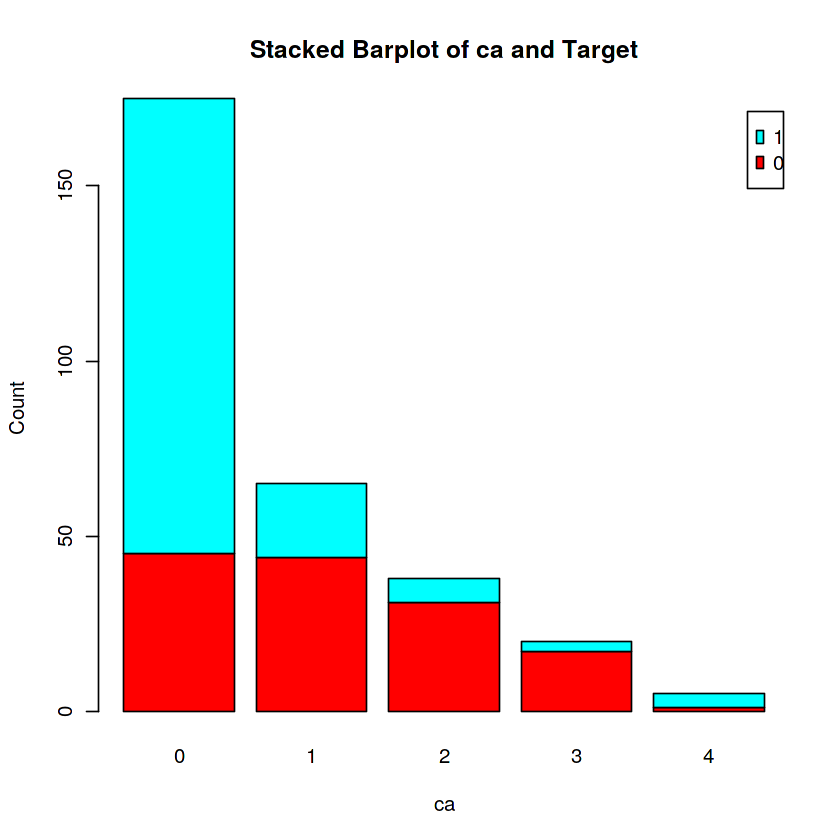

In [29]:
n=table(data$ca)
barplot(n,
       main="Barplot of ca",
       xlab="ca",
       col=rainbow(5),
       legend=rownames(n),
       ylab="Count")
o=table(data$target,data$ca)
barplot(o,
       main="Stacked Barplot of ca and Target",
       xlab="ca",
        col=rainbow(2),
       legend=rownames(o),
       ylab="Count")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.02”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.02”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.02”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 1.02”Warning message in predLoess(object$y, o

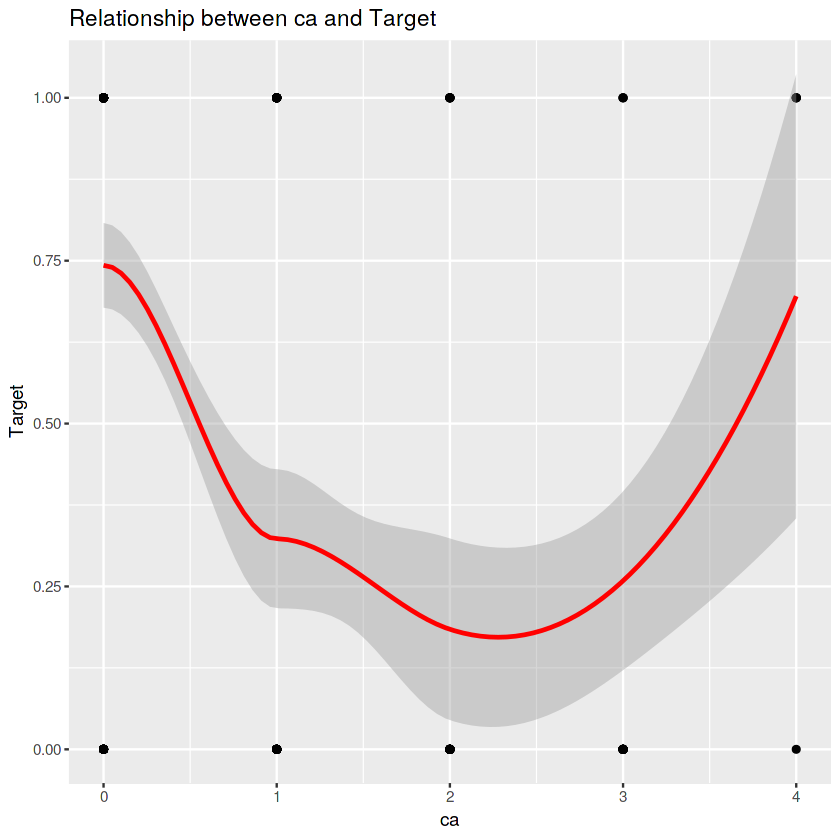

In [30]:
#relationshipe between ca and target
library(ggplot2)
ggplot(data,aes(x=ca,y=target))+geom_point()+geom_smooth(color="red")+
    scale_x_continuous(name="ca")+
    scale_y_continuous(name="Target")+
    ggtitle("Relationship between ca and Target")

# Data Preparation

We can see data is already clean, So we do not need to do any extra work. Let us split the data in training and testing set.

In [31]:
head(data,10)
library(caTools)
set.seed(123)
sample=sample.split(data$target,SplitRatio=0.80)
train_set=subset(data,sample==TRUE)
test_set=subset(data,sample==FALSE)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


# Logistic Regression Model

In [32]:
model=glm(target~.,train_set,family=binomial())
summary(model)


Call:
glm(formula = target ~ ., family = binomial(), data = train_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5460  -0.3572   0.1466   0.5643   2.7726  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.466980   3.030472   1.474 0.140476    
age         -0.032442   0.027681  -1.172 0.241198    
sex1        -1.995588   0.555736  -3.591 0.000330 ***
cp1          1.573382   0.643906   2.443 0.014546 *  
cp2          2.006606   0.536078   3.743 0.000182 ***
cp3          2.486743   0.774391   3.211 0.001322 ** 
trestbps    -0.022184   0.012981  -1.709 0.087459 .  
chol        -0.005652   0.004270  -1.324 0.185566    
fbs         -0.188270   0.595838  -0.316 0.752021    
restecg      0.123054   0.411491   0.299 0.764907    
thalach      0.026675   0.012303   2.168 0.030143 *  
exang       -0.713866   0.499869  -1.428 0.153262    
oldpeak     -0.448516   0.256194  -1.751 0.079999 .  
slope        0.513001   0.427441   1.200 0.

We can see P value of sex,cp,thalach,oldpeak and ca is less than 0.05. So these independent variables are significant. Let rebuild model using these significant variable only.

# Rerun Model

In [33]:
newModel=glm(target~sex+cp+thalach+oldpeak+ca,train_set,family=binomial())
summary(newModel)


Call:
glm(formula = target ~ sex + cp + thalach + oldpeak + ca, family = binomial(), 
    data = train_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5702  -0.4842   0.2004   0.5626   2.2234  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.439841   1.494989  -2.301 0.021396 *  
sex1        -1.548473   0.450424  -3.438 0.000586 ***
cp1          1.723062   0.585965   2.941 0.003276 ** 
cp2          2.179207   0.472459   4.612 3.98e-06 ***
cp3          2.142655   0.700837   3.057 0.002234 ** 
thalach      0.032392   0.009773   3.314 0.000918 ***
oldpeak     -0.713307   0.202268  -3.527 0.000421 ***
ca          -0.653736   0.187375  -3.489 0.000485 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 333.48  on 241  degrees of freedom
Residual deviance: 178.67  on 234  degrees of freedom
AIC: 194.67

Number of Fisher Scoring iter

# Model Interpretation

1. P value of Sex, cp,thalach,oldpeak and ca is less than 0.05. So these variables are significant.

2. Slope of Significant Variables:

> sex=-1.57
> cp=0.93
> thalach=0.034
> oldpeak=-0.81
> ca=0.66

3. On the basis of Slope, See the relationship with target variable:

> One unit increase in cp will increase the log odd of heart attack verses Non heart attack by 0.93. It signifies that on increasing Chest pain, Probability of Heart attack will increase.

> One unit increase in thalach will increase the log odd of heart attack verses Non heart attack by 0.034. It signifies that on increasing thalach, Probability of Heart attack will increase.

> One unit increase in oldpeak will decrease the log odd of heart attack verses Non heart attack by 0.81. It signifies that on increasing oldpeak, Probability of Heart attack will decrease.

> One unit increase in ca will increase the log odd of heart attack verses Non heart attack by 0.66. It signifies that on increasing ca, Probability of Heart attack will increase.

# Predection

Now let us predict the target with test data set.

In [34]:
pred=predict(newModel,test_set,type="response")

predNew=as.data.frame(pred)

categorise=function(x){
    return(ifelse(x>0.5,1,0))
}

predNew=apply(predNew,2,categorise)
head(predNew,10)

,pred
4,1
5,1
8,1
11,0
16,1
20,1
21,0
24,1
31,1
32,0


# Model Evaluation

Let us see confusion matrix and accuracy of our model.

1. We can see that our model has accuracy of 72% in predecting future data with Logistic Regression model.

In [35]:
library(caret)
confusionMatrix(as.factor(test_set$target),as.factor(predNew))

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:httr’:

    progress



Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 17 11
         1  6 27
                                          
               Accuracy : 0.7213          
                 95% CI : (0.5917, 0.8285)
    No Information Rate : 0.623           
    P-Value [Acc > NIR] : 0.07102         
                                          
                  Kappa : 0.4312          
                                          
 Mcnemar's Test P-Value : 0.33198         
                                          
            Sensitivity : 0.7391          
            Specificity : 0.7105          
         Pos Pred Value : 0.6071          
         Neg Pred Value : 0.8182          
             Prevalence : 0.3770          
         Detection Rate : 0.2787          
   Detection Prevalence : 0.4590          
      Balanced Accuracy : 0.7248          
                                          
       'Positive' Class : 0               
                                    

# Summary

Accuracy of Our model is 72% which is good for future predection.

In [36]:
final_data=cbind(test_set,predNew)
head(final_data,10)
write.csv(final_data,"test_data_with_predected.csv")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
8,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,1
11,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,0
16,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1,1
20,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1,1
21,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,0
24,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1,1
31,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1,1
